In [6]:
import pandas as pd

traditional_data = pd.read_csv('./Traditional_to_2000/Trad_80_alpha01/Outputs/Trad_80_alpha01_GRU_80_outputs.csv')
adaptive_data = pd.read_csv('./Adaptive_2000/Adapt_80_alpha01/Outputs/Adapt_80_alpha01_GRU_80_outputs.csv')

/var/folders/qp/wmpntt8n0yxckr9vks3kb7yr0000gp/T/ipykernel_70030/2843338217.py:53: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  axins.plot(index1[inset_slice:], energy1[inset_slice:], 's', color='tab:blue', markersize=5)
/var/folders/qp/wmpntt8n0yxckr9vks3kb7yr0000gp/T/ipykernel_70030/2843338217.py:54: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  axins.fill_between(index1[inset_slice:], energy1[inset_slice:] - error1[inset_slice:], energy1[inset_slice:] + error1[inset_slice:], 

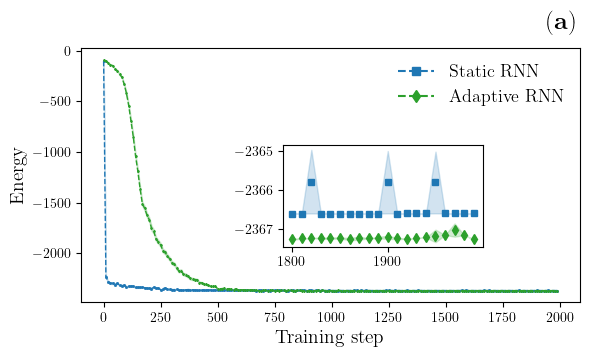

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

start = 0
step = 10

index1 = traditional_data['Unnamed: 0'][start::step]
energy1 = traditional_data['Energies'][start::step]
variation1 = traditional_data['Variations'][start::step]

index2 = adaptive_data['Unnamed: 0'][start::step]
energy2 = adaptive_data['Energies'][start::step]
variation2 = adaptive_data['Variations'][start::step]

num_samples = 100
error1 = np.sqrt(variation1 / num_samples)
error2 = np.sqrt(variation2 / num_samples)

# Golden ratio dimensions
golden_ratio = (1 + np.sqrt(5)) / 2
fig_width = 6
fig_height = fig_width / golden_ratio

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Main plot
ax.plot(index1, energy1, 's--', color='tab:blue', linewidth=1, markersize=1, label='Static RNN')
ax.fill_between(index1, energy1 - error1, energy1 + error1, color='tab:blue', alpha=0.2)

ax.plot(index2, energy2, 'd--', color='tab:green', linewidth=1, markersize=1, label='Adaptive RNN')
ax.fill_between(index2, energy2 - error2, energy2 + error2, color='tab:green', alpha=0.2)

from matplotlib.lines import Line2D
custom_legend = [
    Line2D([0], [0], color='tab:blue', linestyle='--', marker='s', markersize=6, label='Static RNN'),
    Line2D([0], [0], color='tab:green', linestyle='--', marker='d', markersize=6, label='Adaptive RNN')
]

ax.set_xlabel('Training step', fontsize=14)
ax.set_ylabel('Energy', fontsize=14)
ax.legend(handles=custom_legend, fontsize=13, frameon = False)

# ax.grid(True, linestyle='--', alpha=0.6)

# Inset plot
axins = inset_axes(ax, width="40%", height="40%", loc='upper right', borderpad=7)

# Last 200 points
inset_slice = -200//step
axins.plot(index1[inset_slice:], energy1[inset_slice:], 's', color='tab:blue', markersize=5)
axins.fill_between(index1[inset_slice:], energy1[inset_slice:] - error1[inset_slice:], energy1[inset_slice:] + error1[inset_slice:], color='tab:blue', alpha=0.2)

axins.plot(index2[inset_slice:], energy2[inset_slice:], 'd', color='tab:green', markersize=5)
axins.fill_between(index2[inset_slice:], energy2[inset_slice:] - error2[inset_slice:], energy2[inset_slice:] + error2[inset_slice:], color='tab:green', alpha=0.2)

# axins.set_xticks([])
# axins.set_yticks([])
# axins.set_title(r'\textbf{Last 200 steps}', fontsize=10)

fig.suptitle(r'$\mathbf{(a)}$', fontsize=18, x=0.92, y=0.95, ha='left')


plt.tight_layout()
fig.savefig("./Ising_longrange_N80_alpha01.pdf")
plt.show()


In [3]:
energy1

0       -105.410126
1       -269.186536
2       -511.179827
3       -920.992330
4      -1384.187160
           ...     
1994   -2366.598906
1995   -2366.598857
1996   -2366.598812
1997   -2366.598771
1998   -2365.812049
Name: Energies, Length: 1999, dtype: float64

In [4]:
energy2

0        -92.969435
1        -94.253991
2        -98.120025
3        -92.391761
4        -94.302281
           ...     
1994   -2367.166648
1995   -2367.205791
1996   -2367.250371
1997   -2367.268997
1998   -2367.224183
Name: Energies, Length: 1999, dtype: float64